# Passando de `plt` para `ax`


## Gráfico de linha

### Em plt

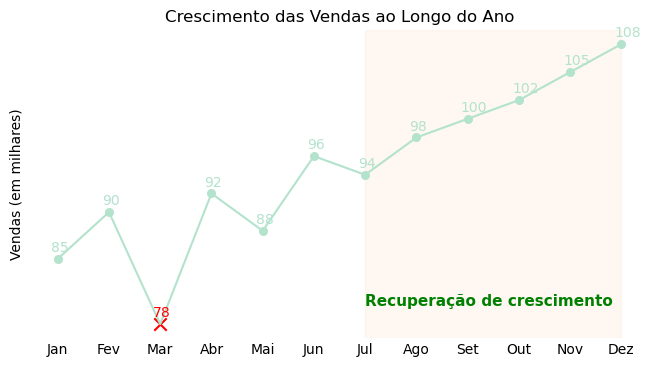

In [1]:
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np

meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
vendas = [85, 90, 78, 92, 88, 96, 94, 98, 100, 102, 105, 108]

cores = plt.get_cmap('Pastel2').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

plt.figure(figsize=(8, 4))
plt.plot(meses, vendas)

# adicionando um vspan para destacar o intervalo de meses com vendas a partir de julho
plt.axvspan(6, 11, color=cores[1], alpha=0.15)

# adicionando texto para destacar o intervalo de meses com vendas a partir de julho
plt.text(6, 80, 'Recuperação de crescimento', fontsize=11, color='green', weight='bold')

# usando o np where, crie uma lista de marcadores x para o valor mínimo e o para o resto
marcadores = np.where(vendas == np.min(vendas), 'x', 'o')
for posicao, marcador in enumerate(marcadores):
    if marcador == 'x':
        cor = 'red'
        tamanho = 80
    else:
        cor = cores[0]
        tamanho = 30
    plt.scatter(meses[posicao], vendas[posicao], marker=marcador, s=tamanho, color=cor)
    plt.annotate(vendas[posicao], color=cor, xy=(meses[posicao], vendas[posicao]), xytext=(-5, 5), textcoords='offset points')

plt.ylabel('Vendas (em milhares)')
plt.title('Crescimento das Vendas ao Longo do Ano')

plt.yticks([])
plt.tick_params(axis='x', length=0)
plt.box(False)

plt.show()


### Em ax

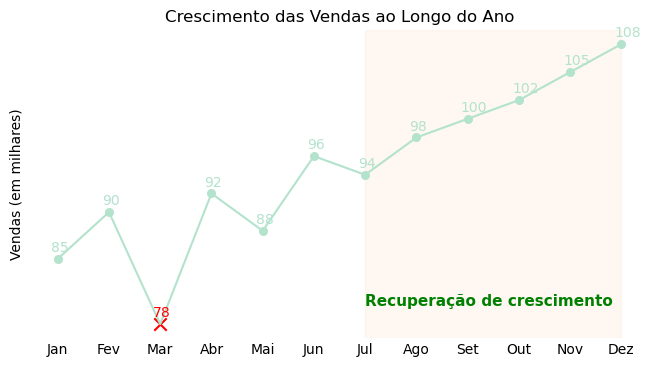

In [2]:

import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np

meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
vendas = [85, 90, 78, 92, 88, 96, 94, 98, 100, 102, 105, 108]

fig, ax = plt.subplots(figsize=(8, 4))

cores = plt.get_cmap('Pastel2').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

ax.plot(meses, vendas)

# adicionando um vspan para destacar o intervalo de meses com vendas a partir de julho
ax.axvspan(6, 11, color=cores[1], alpha=0.15)

# adicionando texto para destacar o intervalo de meses com vendas a partir de julho
ax.text(6, 80, 'Recuperação de crescimento', fontsize=11, color='green', weight='bold')

# usando o np where, crie uma lista de marcadores x para o valor mínimo e o para o resto
marcadores = np.where(vendas == np.min(vendas), 'x', 'o')
for posicao, marcador in enumerate(marcadores):
    if marcador == 'x':
        cor = 'red'
        tamanho = 80
    else:
        cor = cores[0]
        tamanho = 30
    ax.scatter(meses[posicao], vendas[posicao], marker=marcador, s=tamanho, color=cor)
    ax.annotate(vendas[posicao], color=cor, xy=(meses[posicao], vendas[posicao]), xytext=(-5, 5), textcoords='offset points')

ax.set_ylabel('Vendas (em milhares)')
ax.set_title('Crescimento das Vendas ao Longo do Ano')

ax.set_yticks([])
ax.tick_params(axis='x', length=0)
# plt.box(False)
# plt.box(False) se torna ax.set_frame_on(False), pois o box ser refere à borda da figura
ax.set_frame_on(False)

plt.show()


## Gráfico de barras


### Em plt

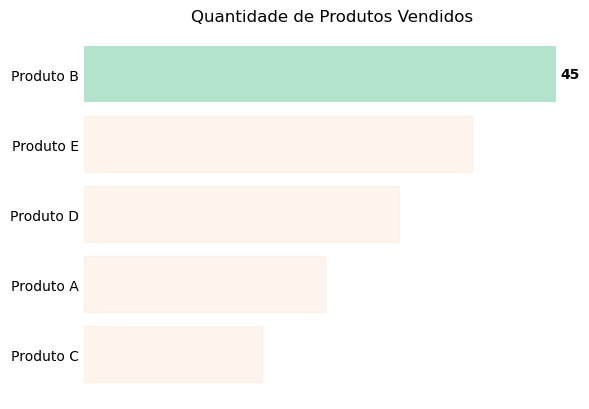

In [3]:
produtos = ['Produto A', 'Produto B', 'Produto C', 'Produto D', 'Produto E']
quantidades = [23, 45, 17, 30, 37]
dados_ordenados = sorted(zip(quantidades, produtos))  # por quantidade
quantidades_ordenadas = [x[0] for x in dados_ordenados]
produtos_ordenados = [x[1] for x in dados_ordenados]

import matplotlib.pyplot as plt
from cycler import cycler

cores = plt.get_cmap('Pastel2').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

barras = plt.barh(produtos_ordenados, quantidades_ordenadas)

plt.bar_label(barras, labels=[max(quantidades_ordenadas) if x == max(quantidades_ordenadas) else '' for x in quantidades_ordenadas],
              padding=3, fontsize=10, fontweight='bold')

# retirando as bordas do gráfico
plt.box(False)

# retirando o eixo x
plt.xticks([])
plt.tick_params(axis='y', length=0)

# destacando a barra do produto com maior quantidade vendida
for i, barra in enumerate(barras):
    if i != quantidades_ordenadas.index(max(quantidades_ordenadas)):
        barras[i].set_color(cores[1])
        barras[i].set_alpha(0.2)


plt.title('Quantidade de Produtos Vendidos')

# caso queira inverter o eixo, descomente a linha abaixo
# plt.gca().invert_yaxis()

plt.show()


### Em ax

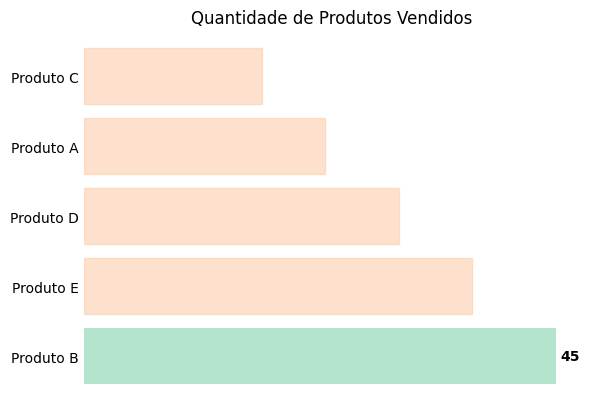

In [3]:

produtos = ['Produto A', 'Produto B', 'Produto C', 'Produto D', 'Produto E']
quantidades = [23, 45, 17, 30, 37]
dados_ordenados = sorted(zip(quantidades, produtos))  # por quantidade
quantidades_ordenadas = [x[0] for x in dados_ordenados]
produtos_ordenados = [x[1] for x in dados_ordenados]

import matplotlib.pyplot as plt
from cycler import cycler

fig, ax = plt.subplots()

cores = plt.get_cmap('Pastel2').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

barras = ax.barh(produtos_ordenados, quantidades_ordenadas)

ax.bar_label(barras, labels=[max(quantidades_ordenadas) if x == max(quantidades_ordenadas) else '' for x in quantidades_ordenadas],
              padding=3, fontsize=10, fontweight='bold')

# retirando as bordas do gráfico
ax.set_frame_on(False)

# retirando o eixo x
ax.set_xticks([])
ax.tick_params(axis='y', length=0)

# destacando a barra do produto com maior quantidade vendida
for i, barra in enumerate(barras):
    if i != quantidades_ordenadas.index(max(quantidades_ordenadas)):
        barras[i].set_color(cores[1])
        barras[i].set_alpha(0.6)


ax.set_title('Quantidade de Produtos Vendidos')

# caso queira inverter o eixo, descomente a linha abaixo
# plt.gca().invert_yaxis()
# Inverter o eixo - passa como parâmetro o próprio gráfico da posição
ax.invert_yaxis()

plt.show()


## Gráfico de pizza


### Em plt

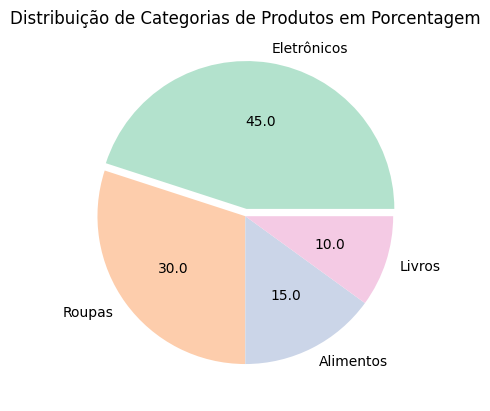

In [4]:
import matplotlib.pyplot as plt

categorias = ['Eletrônicos', 'Roupas', 'Alimentos', 'Livros']
quantidades = [45, 30, 15, 10]
destaque = [0.05, 0, 0, 0]  # destacar a primeira fatia

cores = plt.get_cmap('Pastel2').colors

plt.pie(quantidades, labels=categorias, colors=cores, autopct='%.1f', explode=destaque)
plt.title('Distribuição de Categorias de Produtos em Porcentagem')
plt.show()


### Em ax

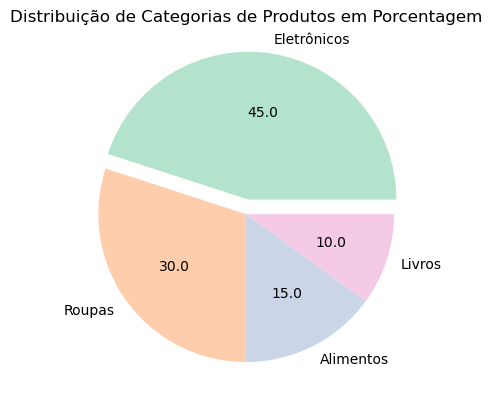

In [6]:
import matplotlib.pyplot as plt

categorias = ['Eletrônicos', 'Roupas', 'Alimentos', 'Livros']
quantidades = [45, 30, 15, 10]
destaque = [0.1, 0, 0, 0]  # destacar a primeira fatia

fig, ax = plt.subplots()

cores = plt.get_cmap('Pastel2').colors

ax.pie(quantidades, labels=categorias, colors=cores, autopct='%.1f', explode=destaque)
ax.set_title('Distribuição de Categorias de Produtos em Porcentagem')
plt.show()


## Gráfico de barras empilhadas


### Em plt

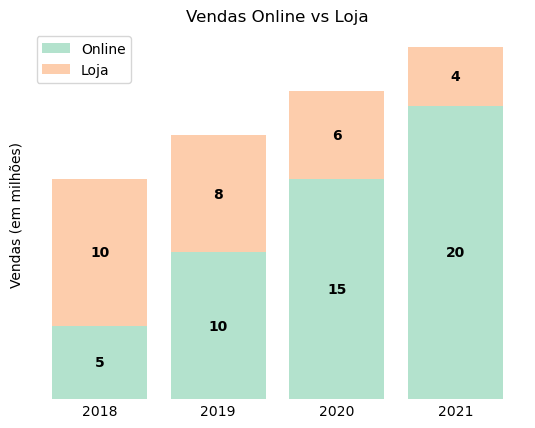

In [7]:
import matplotlib.pyplot as plt
from cycler import cycler

anos = [2018, 2019, 2020, 2021]
vendas_online = [5, 10, 15, 20]
vendas_loja = [10, 8, 6, 4]

# rc = runtime configuration (configuração quando executa)
cores = plt.get_cmap('Pastel2').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

barra_online = plt.bar(anos, vendas_online, label='Online')
barra_loja = plt.bar(anos, vendas_loja, bottom=vendas_online, label='Loja')
plt.bar_label(barra_online, labels=vendas_online, fontsize=10, fontweight='bold', label_type='center')
plt.bar_label(barra_loja, labels=vendas_loja, fontsize=10, fontweight='bold', label_type='center')

# forçar os anos a serem exibidos como inteiros
plt.xticks(ticks=anos)
plt.yticks([])
plt.tick_params(axis='x', length=0)
plt.box(False)

plt.ylabel('Vendas (em milhões)')
plt.title('Vendas Online vs Loja')
plt.legend()
plt.show()


### Em ax


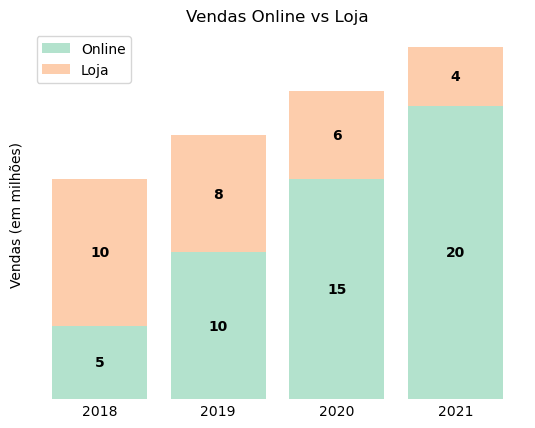

In [8]:
import matplotlib.pyplot as plt
from cycler import cycler

anos = [2018, 2019, 2020, 2021]
vendas_online = [5, 10, 15, 20]
vendas_loja = [10, 8, 6, 4]

fig, ax = plt.subplots()

# rc = runtime configuration (configuração quando executa)
cores = plt.get_cmap('Pastel2').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

barra_online = ax.bar(anos, vendas_online, label='Online')
barra_loja = ax.bar(anos, vendas_loja, bottom=vendas_online, label='Loja')
ax.bar_label(barra_online, labels=vendas_online, fontsize=10, fontweight='bold', label_type='center')
ax.bar_label(barra_loja, labels=vendas_loja, fontsize=10, fontweight='bold', label_type='center')

# forçar os anos a serem exibidos como inteiros
ax.set_xticks(ticks=anos)
ax.set_yticks([])
ax.tick_params(axis='x', length=0)
ax.set_frame_on(False)

ax.set_ylabel('Vendas (em milhões)')
ax.set_title('Vendas Online vs Loja')
ax.legend()
plt.show()
